In [1]:
%matplotlib inline

import os

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cftime

In [2]:
def _get_files_from_archive(casename, nmonths, start_month=1):
    files = []
    rootdir = os.path.join(os.sep, 'glade', 'scratch', 'mlevy', 'archive', casename, 'ocn', 'hist')
    for month in range(start_month, start_month+nmonths):
        files.append(os.path.join(rootdir, f'{casename}.pop.h.nday1.0001-0{month}-01.nc'))
        if not os.path.exists(files[-1]):
            raise FileNotFoundError(f'Can not find {files[-1]}')
    return files

def _get_files_from_rundir(casename, nmonths, start_month):
    files = []
    rootdir = os.path.join(os.sep, 'glade', 'scratch', 'mlevy', casename, 'run')
    for month in range(start_month, start_month+nmonths):
        files.append(os.path.join(rootdir, f'{casename}.pop.h.nday1.0001-0{month}-01.nc'))
        if not os.path.exists(files[-1]):
            raise FileNotFoundError(f'Can not find {files[-1]}')
    return files

def _get_timeseries_from_files(files):
    for file in files:
        print(file)
    ds = xr.open_mfdataset(files, combine='nested', concat_dim='time')
    return ds['HMXL_2'].isel(nlon=897, nlat=142).compute()

In [3]:
%%time

# Case 001 daily HMXL
# January through March are in the archive with old name
files_001 = _get_files_from_archive('g.e22.G1850ECO_JRA_HR.TL319_g17.001', 3)

# April is still in the rundir with new name
files_001 += _get_files_from_rundir('g.e22.G1850ECO_JRA_HR.TL319_t13.001', 1, 4)

da_001 = _get_timeseries_from_files(files_001)

/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_g17.001/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_g17.001.pop.h.nday1.0001-01-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_g17.001/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_g17.001.pop.h.nday1.0001-02-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_g17.001/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_g17.001.pop.h.nday1.0001-03-01.nc
/glade/scratch/mlevy/g.e22.G1850ECO_JRA_HR.TL319_t13.001/run/g.e22.G1850ECO_JRA_HR.TL319_t13.001.pop.h.nday1.0001-04-01.nc
CPU times: user 2.84 s, sys: 3.7 s, total: 6.55 s
Wall time: 7.76 s


In [4]:
%%time

# Case 002 daily HMXL
# January through April are in the archive
files_002 = _get_files_from_archive('g.e22.G1850ECO_JRA_HR.TL319_t13.002', 4)

# May is still in the rundir
files_002 += _get_files_from_rundir('g.e22.G1850ECO_JRA_HR.TL319_t13.002', 1, 5)

da_002 = _get_timeseries_from_files(files_002)

/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.002/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-01-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.002/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-02-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.002/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-03-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.002/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-04-01.nc
/glade/scratch/mlevy/g.e22.G1850ECO_JRA_HR.TL319_t13.002/run/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-05-01.nc
CPU times: user 3.66 s, sys: 5.35 s, total: 9.01 s
Wall time: 10.1 s


In [5]:
%%time

# Case 003 daily HMXL
# January and February are in the archive
files_003 = _get_files_from_archive('g.e22.G1850ECO_JRA_HR.TL319_t13.003', 2)

# Nothing in the rundir for now
# files_003 += _get_files_from_rundir('g.e22.G1850ECO_JRA_HR.TL319_t13.003', 1, 3)

da_003 = _get_timeseries_from_files(files_003)

/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.003/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.003.pop.h.nday1.0001-01-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.003/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.003.pop.h.nday1.0001-02-01.nc
CPU times: user 1.52 s, sys: 1.59 s, total: 3.11 s
Wall time: 3.56 s


In [6]:
%%time

# Case 003 daily HMXL
# January is in the archive
files_004 = _get_files_from_archive('g.e22.G1850ECO_JRA_HR.TL319_t13.004', 1)

# February is in the rundir
files_004 += _get_files_from_rundir('g.e22.G1850ECO_JRA_HR.TL319_t13.004', 1, 2)

da_004 = _get_timeseries_from_files(files_004)

/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.004/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.004.pop.h.nday1.0001-01-01.nc
/glade/scratch/mlevy/g.e22.G1850ECO_JRA_HR.TL319_t13.004/run/g.e22.G1850ECO_JRA_HR.TL319_t13.004.pop.h.nday1.0001-02-01.nc
CPU times: user 1.55 s, sys: 1.52 s, total: 3.07 s
Wall time: 3.36 s


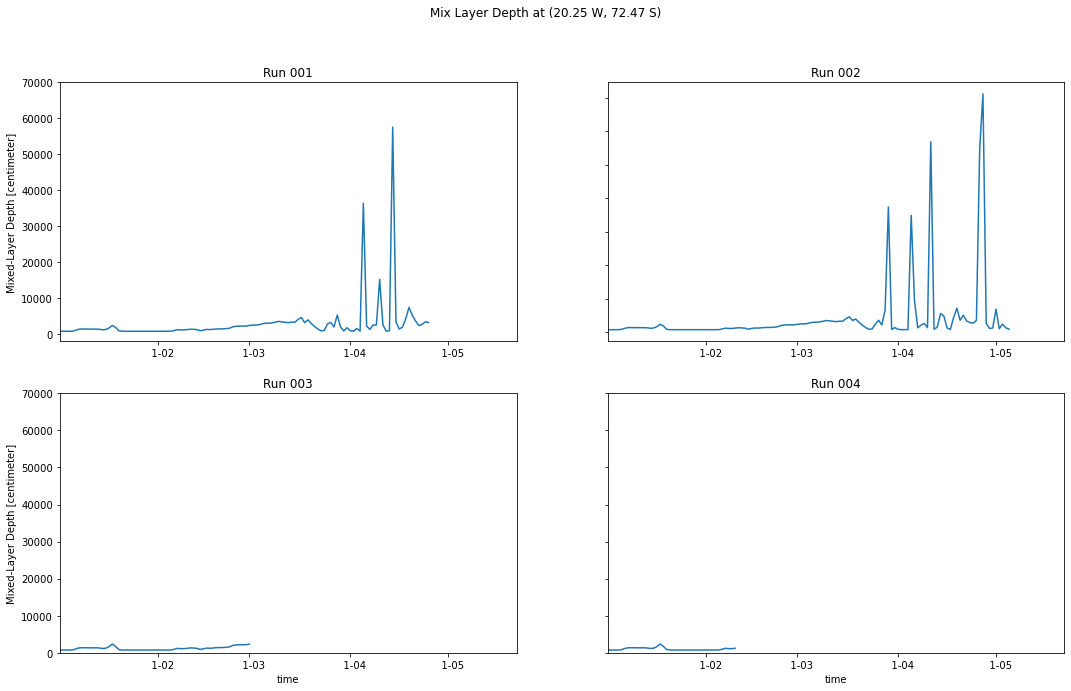

In [7]:
xmin = cftime.num2date(366, 'days since 0000-01-01 00:00:00', calendar='noleap')
xmax = cftime.num2date(506, 'days since 0000-01-01 00:00:00', calendar='noleap')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18.0, 10.5))
yticks=np.linspace(0, 7e4, 8)
# xticks=np.linspace(xmin, xmax, 8)

long_west = 360 - da_001['TLONG'].data
lat_south = -da_001['TLAT'].data
fig.suptitle(f'Mix Layer Depth at ({long_west:.2f} W, {lat_south:.2f} S)')

ax221 = plt.subplot(221)
da_001.plot()
plt.title('Run 001')
ax221.set_xlim(xmin, xmax)
plt.xlabel('')
plt.yticks(yticks)

ax222 = plt.subplot(222)
da_002.plot()
plt.title('Run 002')
ax222.set_xlim(xmin, xmax)
plt.xlabel('')
plt.yticks(yticks, '')
plt.ylabel('')

ax223 = plt.subplot(223)
da_003.plot()
plt.title('Run 003')
ax223.set_xlim(xmin, xmax)
plt.yticks(yticks)

ax224 = plt.subplot(224)
da_004.plot()
plt.title('Run 004')
ax224.set_xlim(xmin, xmax)
plt.yticks(yticks, '')
plt.ylabel('')

plt.show()